# Clustering

## import dependencies

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [27]:
# Load dataset
df=pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")

In [28]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [31]:
# Drop ID column
df = df.drop(columns=["ID#"])

In [33]:
# Handle missing values (if any)
df = df.dropna()

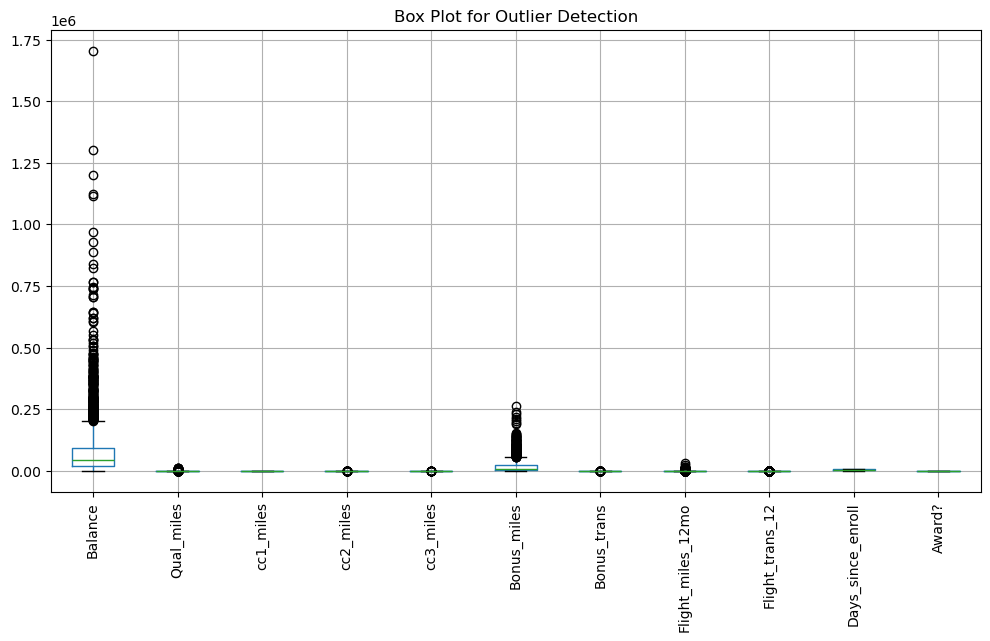

In [35]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Box Plot for Outlier Detection")
plt.show()

In [37]:
# Remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df = remove_outliers_iqr(df)

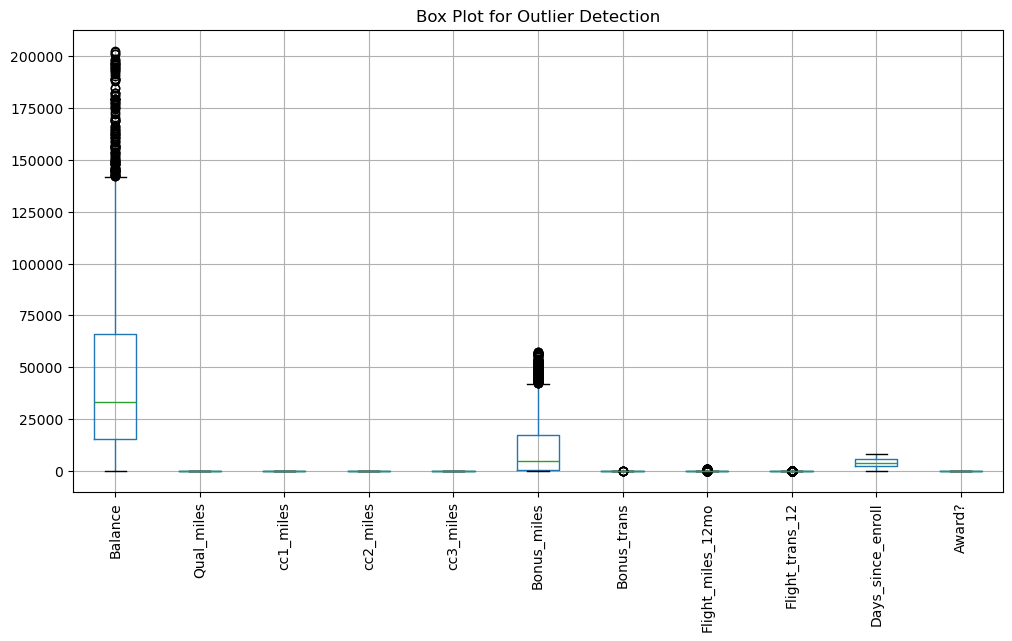

In [39]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Box Plot for Outlier Detection")
plt.show()

In [41]:
# Additional outlier removal for 'Balance' and 'Bonus_miles' using 3 standard deviations
for col in ['Balance', 'Bonus_miles']:
    mean = df[col].mean()
    std = df[col].std()
    df = df[(df[col] >= mean - 3 * std) & (df[col] <= mean + 3 * std)]


In [45]:
# Scale data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [49]:
# Determine optimal K using Silhouette Score
best_k = 2
best_score = -1
K_range = range(2, 11)  # Starting from 2 because silhouette score is undefined for K=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    if score > best_score:
        best_k = k
        best_score = score

print(f"Optimal number of clusters based on Silhouette Score: {best_k}")

Optimal number of clusters based on Silhouette Score: 3


In [51]:
# Apply K-Means with the optimal K value
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

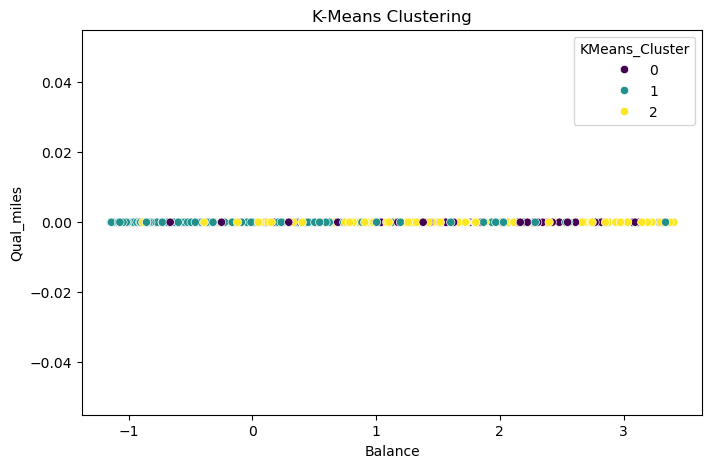

In [53]:
# Visualize K-Means Clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering")
plt.show()

In [55]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
df_scaled['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

In [57]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune parameters accordingly
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

In [59]:
# Silhouette Scores
print("Silhouette Score - KMeans:", silhouette_score(df_scaled, df_scaled['KMeans_Cluster']))
print("Silhouette Score - Hierarchical:", silhouette_score(df_scaled, df_scaled['Hierarchical_Cluster']))
print("Silhouette Score - DBSCAN:", silhouette_score(df_scaled, df_scaled['DBSCAN_Cluster']) if len(set(df_scaled['DBSCAN_Cluster'])) > 1 else "N/A")

Silhouette Score - KMeans: 0.3568226681542807
Silhouette Score - Hierarchical: 0.34541435636708673
Silhouette Score - DBSCAN: 0.3472159357388874
